In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Research Question 2

## How many different styles are there?

In [1]:
import pandas as pd
import numpy as np
import torch
import pytorch_lightning as L

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load Style_Model from trained model

import sys
sys.path.append('..')

from util.style_model import StyleModel

model = StyleModel()
model.load_state_dict(torch.load('../model/Style_Model.pt'))

<All keys matched successfully>

In [3]:
# load testing data
test_data = pd.read_pickle('../data/04c_Test_Set.pkl')

In [6]:
# Calculate All Embeddings
embeddings = [model(message).squeeze().detach().numpy() for message in test_data['message']]

Use a K-Means Clustering Approach and Determine the best number of styles by minimizing distortion:

In [14]:
from sklearn.cluster import KMeans
from tqdm import tqdm

inertia = []
K = range(20, 200, 20)

for k in tqdm(K):
    kmeans = KMeans(k)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

100%|██████████| 9/9 [01:50<00:00, 12.30s/it]


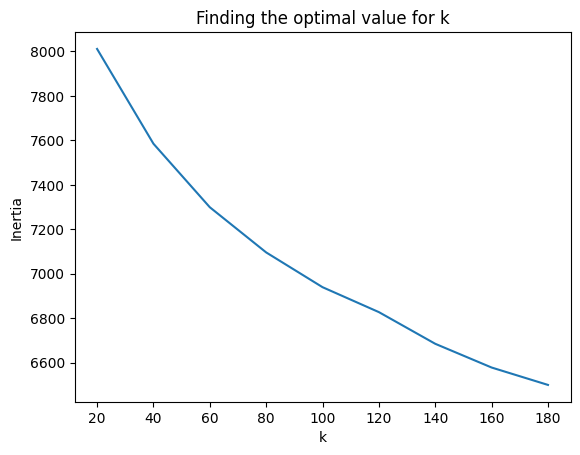

In [15]:
import matplotlib.pyplot as plt

plt.plot(K, inertia)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Finding the optimal value for k')
plt.show()

In [ ]:
kmeans = KMeans(100) # insert the number of styles here
kmeans.fit(embeddings)
kmeans_prediction = kmeans.predict(embeddings)

### Characteristics per Style

TODO: Add SpaCy Features to K-Means Summary Function and Print Class Function

In [ ]:
import sys
sys.path.append('.')

from util.clustering_eval import clustering_summary

k_means_summary = clustering_summary(kmeans_prediction, kmeans.n_clusters, test_data)
k_means_summary

In [ ]:
k_means_summary.describe()

In [ ]:
from util.clustering_eval import print_clustering_classes

print_clustering_classes(kmeans_prediction, kmeans.n_clusters, test_data[:])